# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Definition of random number generation and limits

In [2]:
# Parameters of the gaussian distribution

mean = 0
sigma = 1

# Considered limits

limlow = np.array([mean-sigma, mean-2*sigma,mean-3*sigma,mean-4*sigma,mean-5*sigma])
limhig = np.array([mean+sigma, mean+2*sigma,mean+3*sigma,mean+4*sigma,mean+5*sigma])

# Number generation procedure

def myrnd(N=1):
    
    rvec = np.random.normal(mean,sigma, size=(N))

    return rvec


### (2) Generate multiple numbers

In [3]:
Nmc = 100000000

rvec = myrnd(Nmc)

### (3)  Count limit probability

In [6]:
print("\nLower limit probability:")

for ll in limlow :
    nl = np.sum(rvec < ll)
    p = nl/Nmc
    ep = np.sqrt(p*(1-p)/Nmc)
    print (" P ( x < ",ll,") = ",p," +/- ",ep)
    
print("\nUpper limit probability:")

for ul in limhig :
    nl = np.sum(rvec > ul)
    p = nl/Nmc
    ep = np.sqrt(p*(1-p)/Nmc)
    print (" P ( x > ",ul,") = ",p," +/- ",ep)
    


Lower limit probability:
 P ( x <  -1 ) =  0.15868235  +/-  3.6537961327703754e-05
 P ( x <  -2 ) =  0.0227639  +/-  1.4914994085412841e-05
 P ( x <  -3 ) =  0.00134431  +/-  3.6640180548462093e-06
 P ( x <  -4 ) =  3.164e-05  +/-  5.624855456845092e-07
 P ( x <  -5 ) =  3.8e-07  +/-  6.164412831730204e-08

Upper limit probability:
 P ( x >  1 ) =  0.1586844  +/-  3.65381528264142e-05
 P ( x >  2 ) =  0.02276074  +/-  1.4913982940399389e-05
 P ( x >  3 ) =  0.00135359  +/-  3.6766258908296613e-06
 P ( x >  4 ) =  3.159e-05  +/-  5.620409422088395e-07
 P ( x >  5 ) =  3.1e-07  +/-  5.567763499826479e-08


### (4) Plot distribution histogram

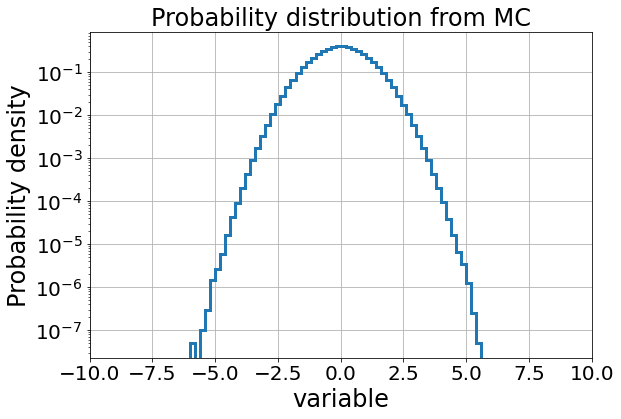

In [10]:
# Range for result histogram

Xmax=10.
Nbin = 100

# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(rvec,bins=Nbin, range=[-Xmax,Xmax], density=True, log=True, histtype='step',linewidth=3)

plt.title("Probability distribution from MC",size=24)
plt.xlabel('variable',size=24)
plt.ylabel('Probability density',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-Xmax,Xmax])
plt.grid(which='major', axis='both')

fname = '06_interval.png'
plt.savefig(fname)

plt.show()